In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Carga y Visualización

In [2]:
sales = pd.read_csv("sales_train.csv")
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [3]:
shops = pd.read_csv("shops.csv")

#### Join entre Tablas

In [4]:
sales['date'] = pd.to_datetime(sales['date'], dayfirst = True)
sales['month'] = sales['date'].dt.to_period('M')
sales = sales.drop(columns = ["date_block_num"])
sales

,date,shop_id,item_id,item_price,item_cnt_day,month
0,2013-01-02,59,22154,999.00,1.0,2013-01
1,2013-01-03,25,2552,899.00,1.0,2013-01
2,2013-01-05,25,2552,899.00,-1.0,2013-01
3,2013-01-06,25,2554,1709.05,1.0,2013-01
4,2013-01-15,25,2555,1099.00,1.0,2013-01
...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,1.0,2015-10
2935845,2015-10-09,25,7460,299.00,1.0,2015-10
2935846,2015-10-14,25,7459,349.00,1.0,2015-10
2935847,2015-10-22,25,7440,299.00,1.0,2015-10


In [5]:
df = pd.merge(sales, shops, on = "shop_id", how = "left")
df

,date,shop_id,item_id,item_price,item_cnt_day,month,shop_name
0,2013-01-02,59,22154,999.00,1.0,2013-01,"Yaroslavl TC"" Altair """
1,2013-01-03,25,2552,899.00,1.0,2013-01,"Moscow TEC"" Atrium """
2,2013-01-05,25,2552,899.00,-1.0,2013-01,"Moscow TEC"" Atrium """
3,2013-01-06,25,2554,1709.05,1.0,2013-01,"Moscow TEC"" Atrium """
4,2013-01-15,25,2555,1099.00,1.0,2013-01,"Moscow TEC"" Atrium """
...,...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,1.0,2015-10,"Moscow TEC"" Atrium """
2935845,2015-10-09,25,7460,299.00,1.0,2015-10,"Moscow TEC"" Atrium """
2935846,2015-10-14,25,7459,349.00,1.0,2015-10,"Moscow TEC"" Atrium """
2935847,2015-10-22,25,7440,299.00,1.0,2015-10,"Moscow TEC"" Atrium """


In [6]:
#df.to_csv("sales_final.csv", index = False)

#### GRAFICAS

In [7]:

def ventas_tienda_mes(df, shop_id, month, year):
    df_day_filter = df[(df['shop_id'] == shop_id) &
                       (df['date'].dt.month == month) &
                       (df['date'].dt.year == year)]
    
    if df_day_filter.empty:
        print(f"No hay datos para la tienda {shop_id} en {month}/{year}")
        return None
    
    df_daily_sale = df_day_filter.groupby('date')['item_price'].sum().reset_index()
    df_daily_sale.rename(columns = {'item_price': 'daily_sales'}, inplace = True)
    
    plt.figure(figsize = (15,6))
    plt.plot(df_daily_sale['date'], df_daily_sale['daily_sales'], marker = 'o', linestyle = '-', color = 'blue')
    plt.title(f"Ventas diarias de Tienda {shop_id} - {month}/{year}")
    plt.xlabel("Fecha")
    plt.ylabel("Ventas")
    plt.grid(True)
    plt.xticks(rotation = 45)
    plt.show()

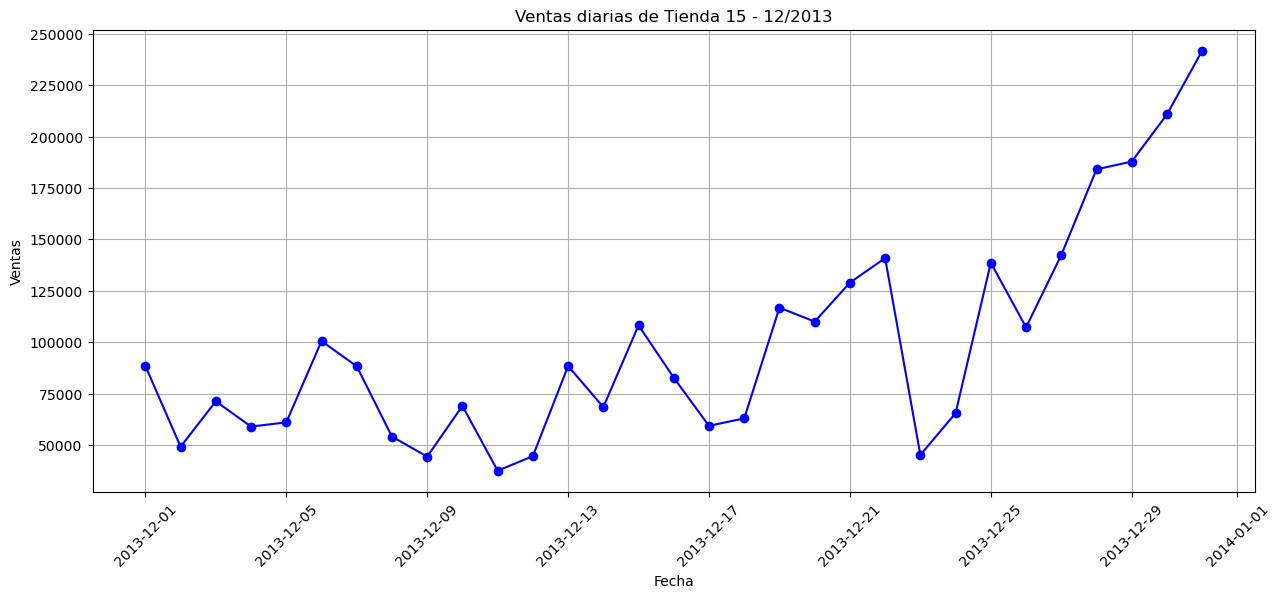

In [8]:
# El segundo parámetro va de 0 a 59
ventas_tienda_mes(df, 15, 12, 2013)

In [9]:
def ventas_tienda_año(df, shop_id, year):
    df_shop = df[(df['shop_id'] == shop_id) &
                 (df['date'].dt.year == year)]
    
    if df_shop.empty:
        print(f"No hay datos para la tienda {shop_id} en el año {year}")
        return
    
    df_shop = df[df['shop_id'] == shop_id].copy()
    df_shop['month'] = df_shop['date'].dt.month

    df_monthly = df_shop.groupby('month')['item_price'].sum().reset_index()
    df_monthly.rename(columns = {'item_price' : 'monthly_sales'}, inplace = True)

    plt.figure(figsize = (15,6))
    plt.plot(df_monthly['month'], df_monthly['monthly_sales'], marker = 'o', linestyle = '-', color = 'skyblue')
    plt.title(f"Ventas mensuales Tienda {shop_id} - Año {year}")
    plt.xlabel("Mes")
    plt.ylabel("Ventas (Millones)")
    plt.xticks(range(1,13))  
    plt.grid(True)
    plt.show()

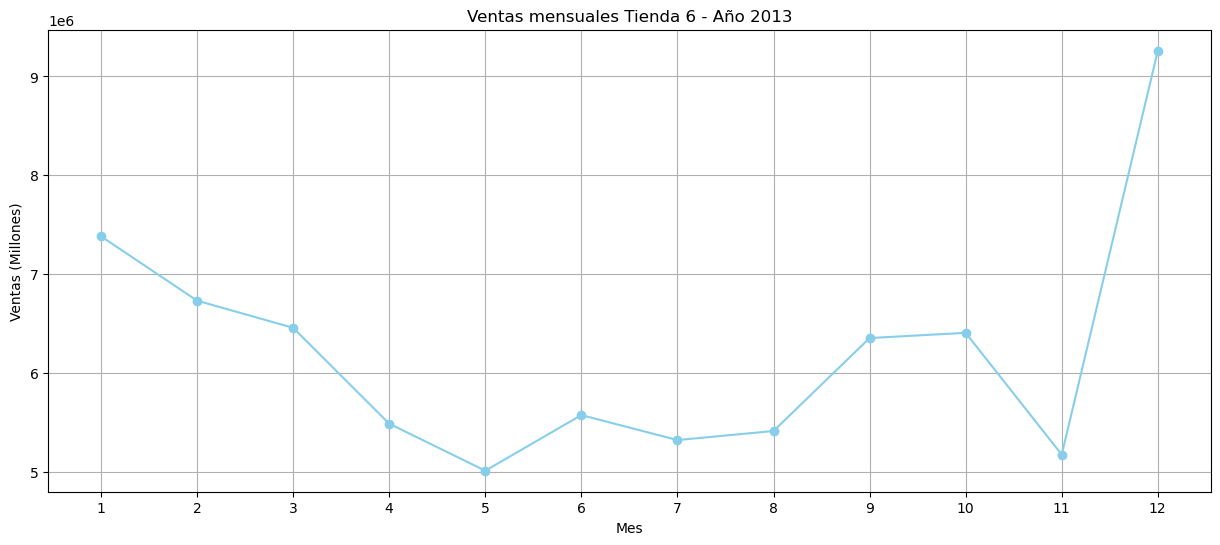

In [10]:
# El segundo parámetro va de 0 a 59
ventas_tienda_año(df, 6, 2013)

In [11]:
def ventas_item_tienda_mes(df, shop_id, item_id, month, year):
    df_item = df[(df['shop_id'] == shop_id) &
                 (df['item_id'] == item_id) &
                 (df['date'].dt.month == month) &
                 (df['date'].dt.year == year)].copy()
    
    if df_item.empty:
        print(f"No hay datos para el item {item_id} en la tienda {shop_id} durante {month}/{year}")
        return None
    
    df_item_daily = df_item.groupby('date')['item_price'].sum().reset_index()
    df_item_daily.rename(columns = {'item_price': 'daily_item_sales'}, inplace = True)

    plt.figure(figsize = (15,6))
    plt.plot(df_item_daily['date'], df_item_daily['daily_item_sales'], marker = 'o', linestyle = '-', color = 'red')
    plt.title(f"Ventas diarias del item {item_id} Tienda {shop_id} - {month}/{year}")
    plt.xlabel("Fecha")
    plt.ylabel("Ventas")
    plt.grid(True)
    plt.xticks(rotation = 45)
    plt.show()
    
    return df_item_daily


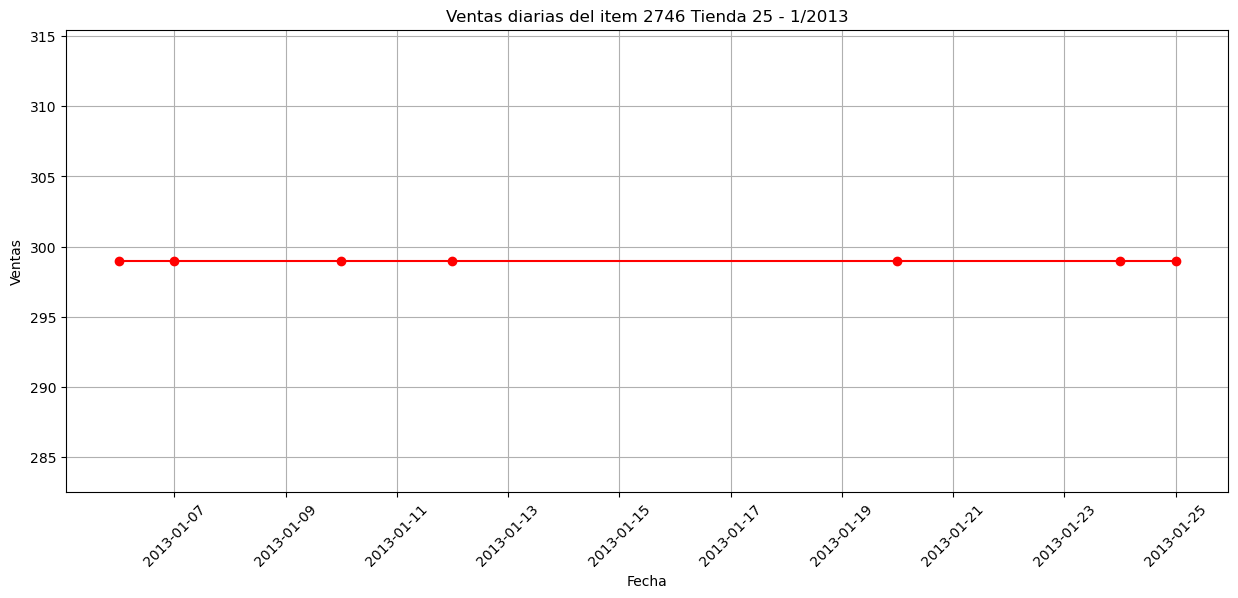

,date,daily_item_sales
0,2013-01-06,299.0
1,2013-01-07,299.0
2,2013-01-10,299.0
3,2013-01-12,299.0
4,2013-01-20,299.0
5,2013-01-24,299.0
6,2013-01-25,299.0


In [12]:
# El segundo parámetro va de 0 a 59 SHOP
# El tercer parámetro va de 0 22169 ITEM
ventas_item_tienda_mes(df, 25, 2746, 1, 2013)

In [13]:
def ventas_item_tienda_año(df, shop_id, item_id, year):
    df_item = df[(df['shop_id'] == shop_id) &
                 (df['item_id'] == item_id) &
                 (df['date'].dt.year == year)].copy()
    
    if df_item.empty:
        print(f"No hay datos para el item {item_id} en la tienda {shop_id} durante {year}")
        return None
    
    df_item['month'] = df_item['date'].dt.month

    df_monthly = df_item.groupby('month')['item_price'].sum().reset_index()
    df_monthly.rename(columns={'item_price': 'monthly_sales'}, inplace=True)
   
    plt.figure(figsize = (15,6))
    plt.plot(df_monthly['month'], df_monthly['monthly_sales'],
             marker='o', linestyle='-', color='purple')
    plt.title(f"Ventas mensuales del item {item_id} Tienda {shop_id} - Año {year}")
    plt.xlabel("Mes")
    plt.ylabel("Ventas (Millones)")
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()
    
    return df_monthly

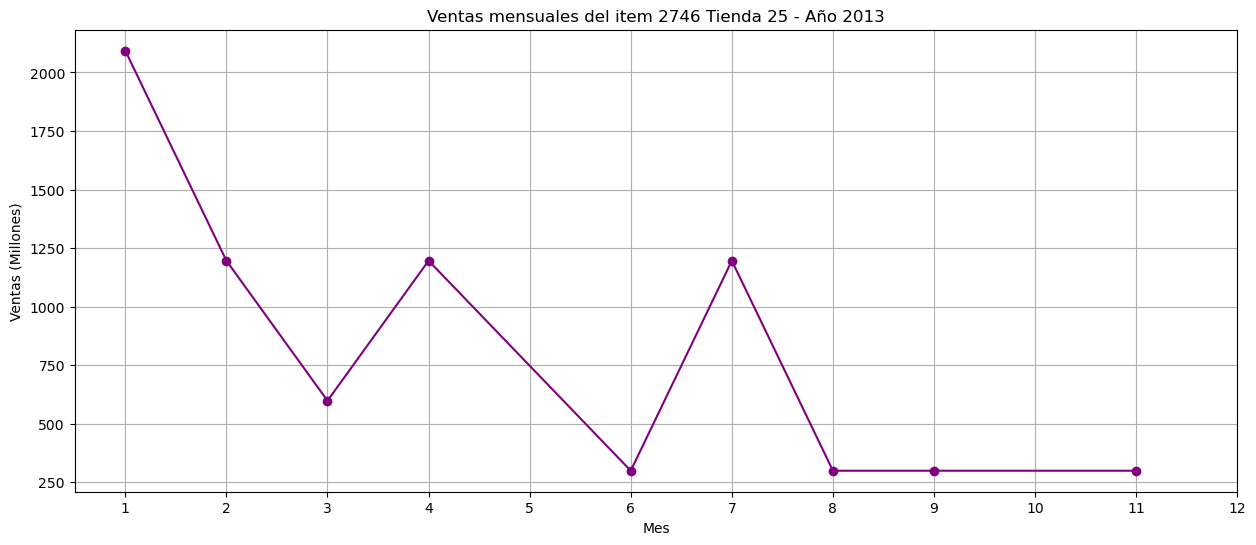

,month,monthly_sales
0,1,2093.0
1,2,1196.0
2,3,598.0
3,4,1196.0
4,6,299.0
5,7,1196.0
6,8,299.0
7,9,299.0
8,11,299.0


In [14]:
# El segundo parámetro va de 0 a 59 SHOP
# El tercer parámetro va de 0 22169 ITEM
ventas_item_tienda_año(df, 25, 2746, 2013)

In [15]:
def ventas_tiendas_año(df, year):
    df_year = df[df['date'].dt.year == year].copy()
    
    if df_year.empty:
        print(f"No hay datos para el año {year}")
        return None

    df_shop = df_year.groupby('shop_id')['item_price'].sum().reset_index()
    df_shop.rename(columns={'item_price': 'yearly_sales'}, inplace = True)

    plt.figure(figsize = (15,6))
    plt.plot(df_shop['shop_id'].astype(str), df_shop['yearly_sales'], marker='o', linestyle='-', color = 'green')
    plt.xlabel("Tienda")
    plt.ylabel("Ventas Anuales (Millones)")
    plt.title(f"Ventas anuales por tienda - Año {year}")
    plt.xticks(range(0,len(df_shop)))
    plt.grid(True)
    plt.show()
    
    #return df_shop

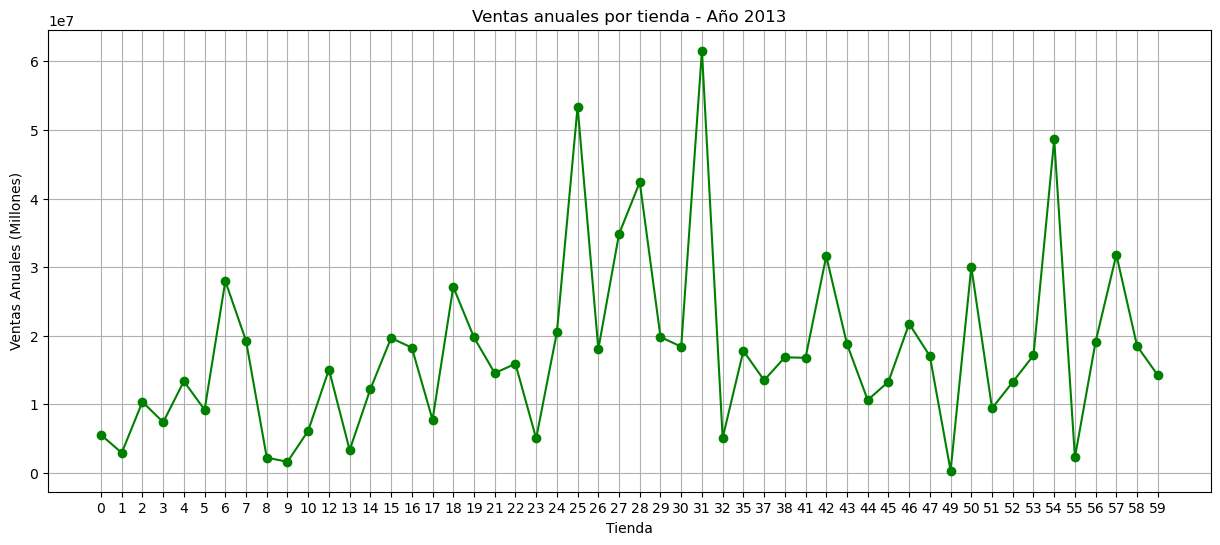

In [16]:
ventas_tiendas_año(df, 2013)

In [17]:
def ventas_item_tienda_año(df, shop_id, item_id, year):
    df_item = df[(df['shop_id'] == shop_id) & 
                   (df['item_id'] == item_id) & 
                   (df['date'].dt.year == year)].copy()
    
    if df_item.empty:
        print(f"No hay datos para el item {item_id} en la tienda {shop_id} durante {year}")
        return None

    df_item['month'] = df_item['date'].dt.month
    df_mensual = df_item.groupby('month')['item_price'].sum().reset_index()
    df_mensual.rename(columns={'item_price': 'monthly_item_sales'}, inplace=True)

    plt.figure(figsize = (15,5))
    plt.plot(df_mensual['month'], df_mensual['monthly_item_sales'], marker = 'o', linestyle = '-', color = 'purple')
    plt.title(f"Ventas mensuales del item {item_id} en tienda {shop_id} - {year}")
    plt.xlabel("Mes")
    plt.ylabel("Ventas")
    plt.grid(True)
    plt.xticks(range(1,13))  
    plt.show()
    
    return df_mensual

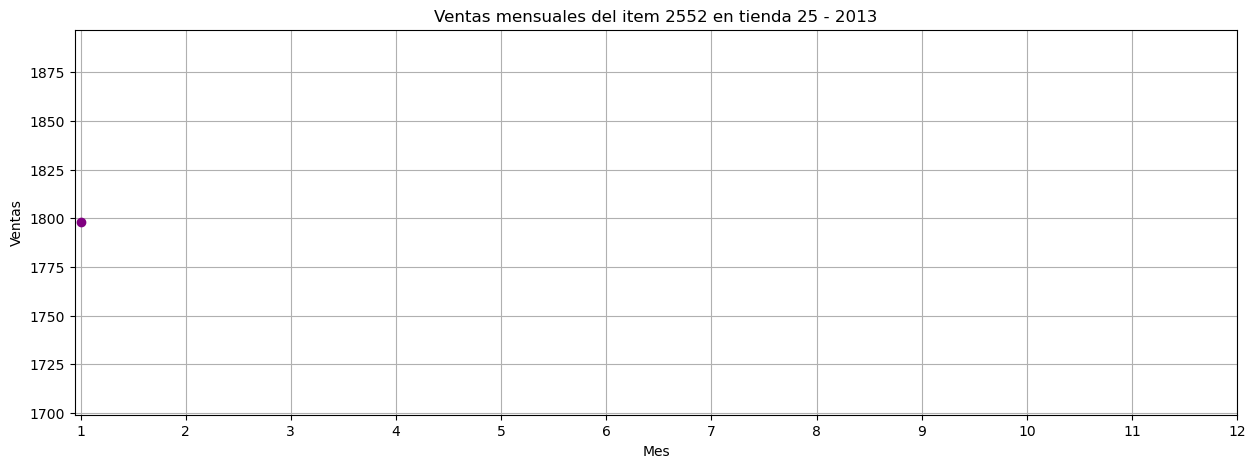

,month,monthly_item_sales
0,1,1798.0


In [18]:
# El segundo parámetro va de 0 a 59 SHOP
# El tercer parámetro va de 0 22169 ITEM
ventas_item_tienda_año(df, 25, 2552, 2013)

In [19]:
def ventas_item_anual(df, item_id, year):
    df_item = df[(df['item_id'] == item_id) & 
                   (df['date'].dt.year == year)].copy()
    
    if df_item.empty:
        print(f"No hay datos para el item {item_id} durante {year}")
        return None

    df_item['month'] = df_item['date'].dt.month
    df_mensual = df_item.groupby('month')['item_price'].sum().reset_index()
    df_mensual.rename(columns={'item_price': 'monthly_item_sales'}, inplace=True)
    
    # Graficar
    plt.figure(figsize = (15,5))
    plt.plot(df_mensual['month'], df_mensual['monthly_item_sales'], marker = 'o', linestyle = '-', color = 'green')
    plt.title(f"Ventas mensuales del item {item_id} en todas las tiendas - {year}")
    plt.xlabel("Mes")
    plt.ylabel("Ventas")
    plt.grid(True)
    plt.xticks(range(1,13)) 
    plt.show()
    
    return df_mensual

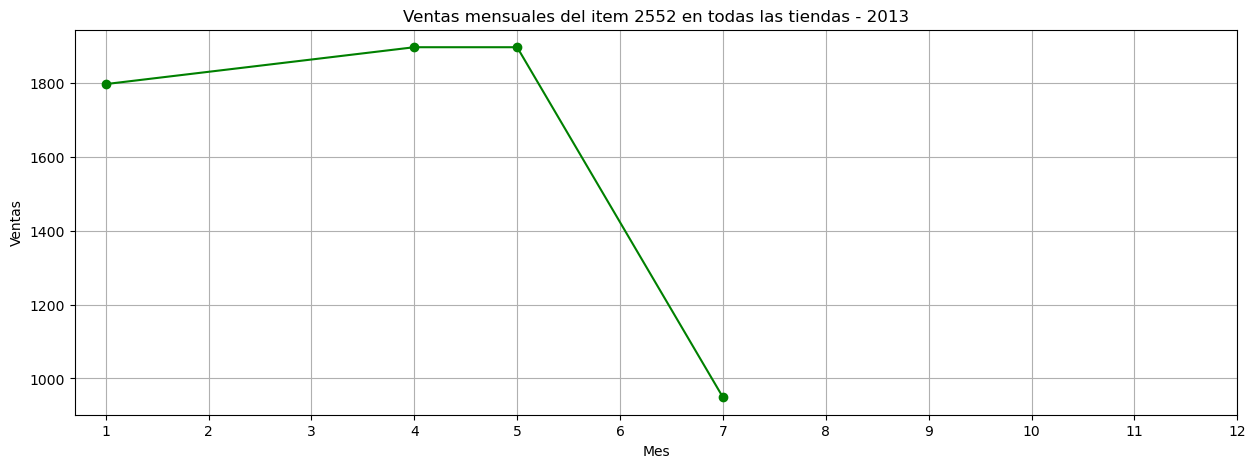

,month,monthly_item_sales
0,1,1798.0
1,4,1898.0
2,5,1898.0
3,7,949.0


In [20]:
# El segundo parámetro va de 0 22169 ITEM
ventas_item_anual(df, 2552, 2013)

### Gráficos sobre datos Históricos

In [21]:
def ventas_item_tienda_historico(df, shop_id, item_id):
    df_item = df[(df['shop_id'] == shop_id) &
                 (df['item_id'] == item_id)].copy()
    
    if df_item.empty:
        print(f"No hay datos para el item {item_id} en la tienda {shop_id}")
        return None

    df_historical = df_item.groupby('date')['item_price'].sum().reset_index()
    df_historical.rename(columns={'item_price': 'historical_sales'}, inplace = True)
   
    plt.figure(figsize = (15,6))
    plt.plot(df_historical['date'], df_historical['historical_sales'], marker='s', linestyle='-', color ='purple')
    plt.title(f"Ventas mensuales del item {item_id} Tienda {shop_id} - Histórico")
    plt.xlabel("Fecha")
    plt.ylabel("Ventas (Millones)")
    plt.grid(True)
    plt.xticks(rotation = 45)
    plt.show()
    
    # return df_historical

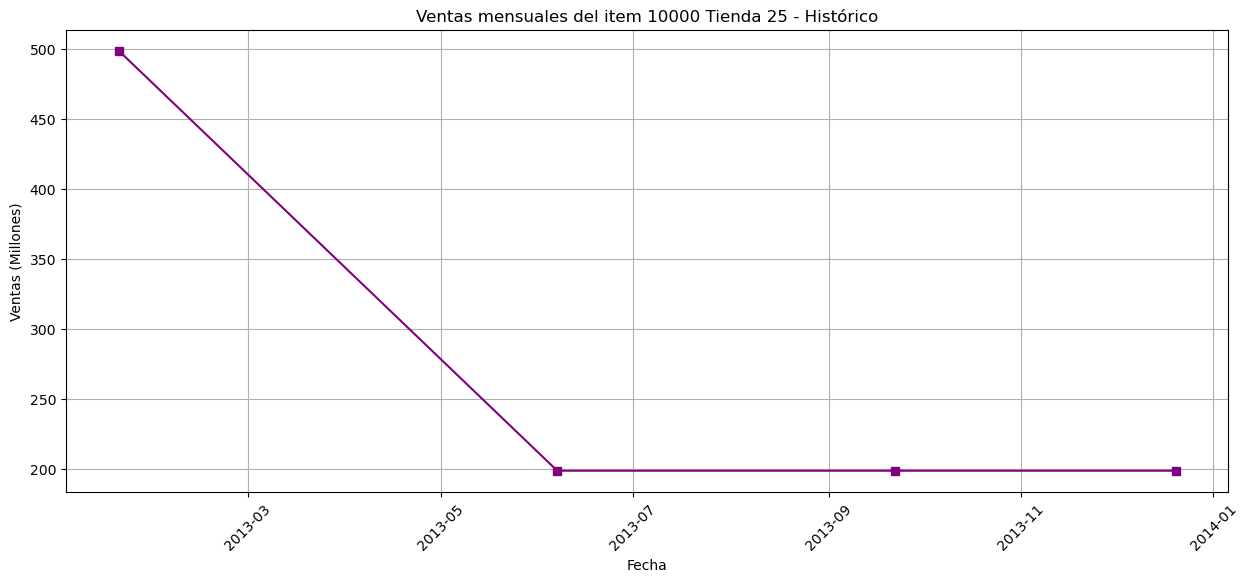

In [22]:
# El segundo parámetro va de 0 a 59 SHOP
# El tercer parámetro va de 0 22169 ITEM
ventas_item_tienda_historico(df, 25, 10000)

In [23]:
def ventas_tienda_historico(df, shop_id):
    df_shop = df[(df['shop_id'] == shop_id)].copy()
    
    if df_shop.empty:
        print(f"No hay datos para la tienda {shop_id}")
        return None

    df_shop_historical = df_shop.groupby('date')['item_price'].sum().reset_index()
    df_shop_historical.rename(columns = {'item_price': 'historical_shop_sales'}, inplace = True)
   
    plt.figure(figsize = (15,6))
    plt.plot(df_shop_historical['date'], df_shop_historical['historical_shop_sales'], marker='s', linestyle='-', color ='purple')
    plt.title(f"Ventas mensuales de la Tienda {shop_id} - Histórico")
    plt.xlabel("Fecha")
    plt.ylabel("Ventas (Millones)")
    plt.grid(True)
    plt.xticks(rotation = 45)
    plt.show()
    
    # return df_shop_historical

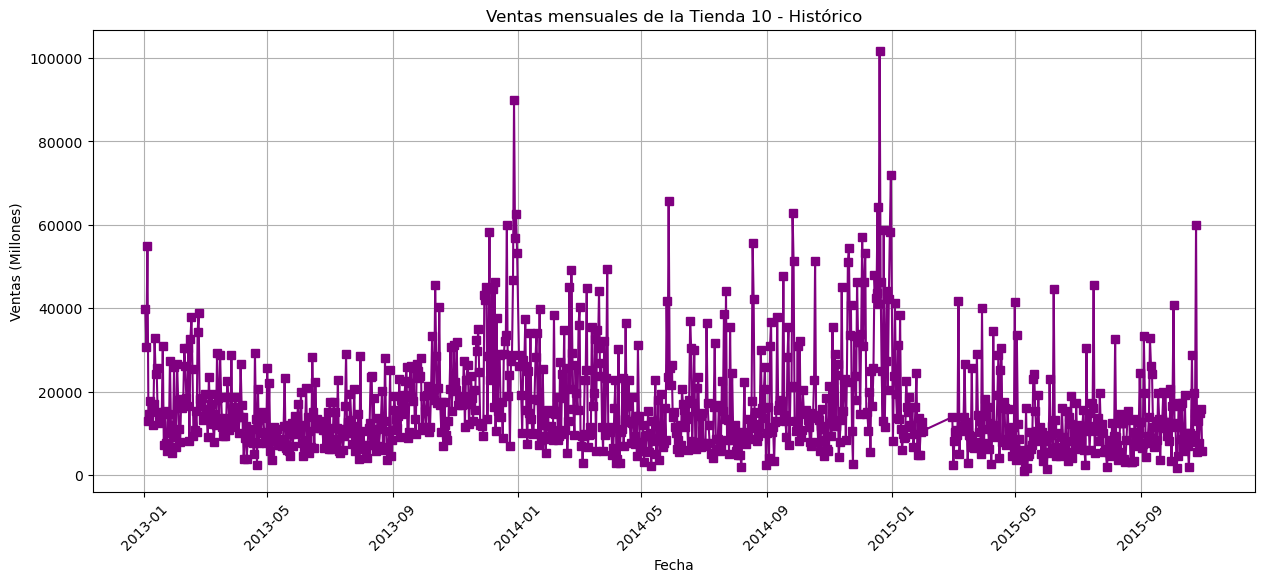

In [24]:
# El segundo parámetro va de 0 a 59
ventas_tienda_historico(df, 10)

In [25]:
def ventas_item(df):
    df_item_sales = df.groupby('item_id')['item_price'].sum().reset_index()
    df_item_sales.rename(columns = {'item_price': 'item_sales'}, inplace = True)
    df_units = df.groupby('item_id')['item_cnt_day'].sum().reset_index()
    df_units.rename(columns = {'item_cnt_day': 'units_sales'}, inplace = True)

    df_item = df_item_sales.merge(df_units, on='item_id')

    plt.figure(figsize = (15,6))
    plt.plot(df_item['item_id'], df_item['item_sales'], marker='s', linestyle='-', color ='blue')
    plt.title(f"Ventas - Histórico")
    plt.xlabel("Item_Id")
    plt.ylabel("Ventas (Millones)")
    plt.grid(True)
    plt.show()

    #df_item.to_csv("ventas_item.csv", index = False)
    
    return df_item

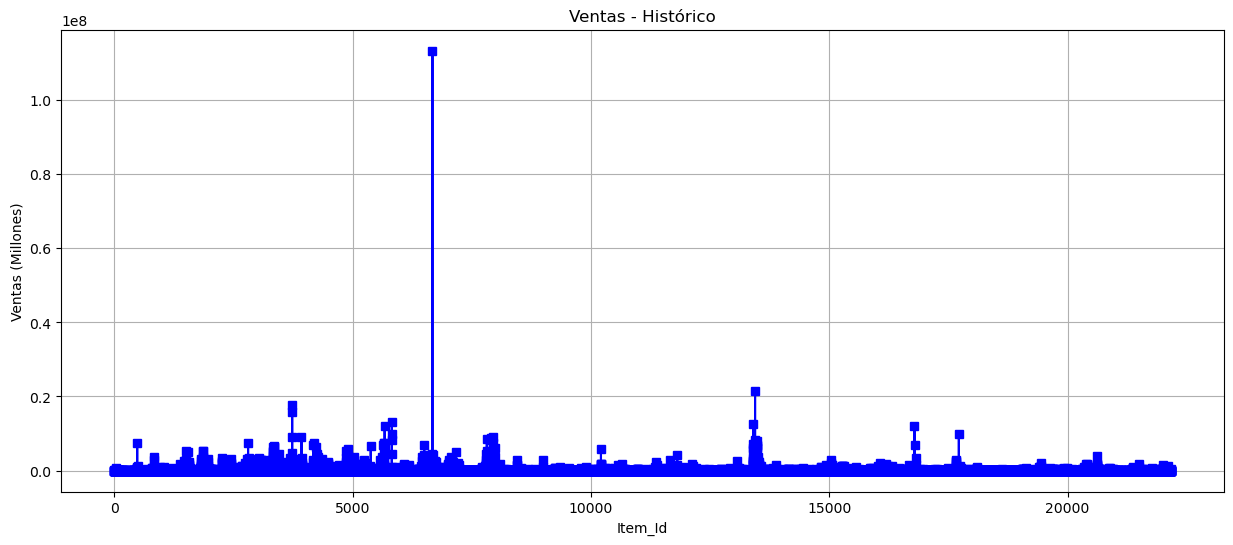

,item_id,item_sales,units_sales
0,0,58.00,1.0
1,1,26940.00,6.0
2,2,116.00,2.0
3,3,158.00,2.0
4,4,58.00,1.0
...,...,...,...
21802,22165,118.00,2.0
21803,22166,40500.00,348.0
21804,22167,331622.75,1320.0
21805,22168,4793.50,6.0


In [26]:
ventas_item(df)

In [27]:
def pareto(df):
    df_sales = df.sort_values(by = "item_sales", ascending = False).reset_index(drop = True)
    total_sales = df_sales["item_sales"].sum()
    sales_percentage = (df_sales["item_sales"].sum()) * 0.8

    top20 = 0
    top_items =[]
    id = []
    units = []

    for index, row in df_sales.iterrows():
        if top20 + row['item_sales'] <= sales_percentage:
            top20 += row['item_sales']
            top_items.append(row['item_id'])
            id.append(row['item_sales']) 
            units.append(row['units_sales'])
        else:
            break

    pareto_items = pd.DataFrame({
        'item_id': top_items,
        'item_sales': id,
        'units_sales': units 
    })

    #pareto_items.to_csv("pareto.csv", index = False)
    return df_sales, sales_percentage, top20

In [28]:
df_pareto = pd.read_csv("ventas_item.csv")
pareto(df_pareto)

(       item_id    item_sales  units_sales
 0         6675  1.132643e+08      10289.0
 1        13443  2.135946e+07       1366.0
 2         3732  1.756505e+07      16642.0
 3         3734  1.589006e+07      11688.0
 4         5823  1.307078e+07       6523.0
 ...        ...           ...          ...
 21802     3856  1.700000e+01          1.0
 21803     7756  1.500000e+01          1.0
 21804    22010  1.400000e+01          1.0
 21805    13090  1.100000e+01          2.0
 21806    22098  7.000000e+00          1.0
 
 [21807 rows x 3 columns],
 2092328457.8905811,
 2092292347.0540843)

In [29]:
pareto_items = pd.read_csv("pareto.csv")
pareto_items

,item_id,item_sales,units_sales
0,6675.0,1.132643e+08,10289.0
1,13443.0,2.135946e+07,1366.0
2,3732.0,1.756505e+07,16642.0
3,3734.0,1.589006e+07,11688.0
4,5823.0,1.307078e+07,6523.0
...,...,...,...
2142,6432.0,1.963530e+05,1134.0
2143,3716.0,1.963505e+05,133.0
2144,15520.0,1.962211e+05,672.0
2145,19536.0,1.961850e+05,739.0


In [30]:
dates = pd.read_csv("sales_final.csv")
dates

,date,shop_id,item_id,item_price,item_cnt_day,month,shop_name
0,2013-01-02,59,22154,999.00,1.0,2013-01,"Yaroslavl TC"" Altair """
1,2013-01-03,25,2552,899.00,1.0,2013-01,"Moscow TEC"" Atrium """
2,2013-01-05,25,2552,899.00,-1.0,2013-01,"Moscow TEC"" Atrium """
3,2013-01-06,25,2554,1709.05,1.0,2013-01,"Moscow TEC"" Atrium """
4,2013-01-15,25,2555,1099.00,1.0,2013-01,"Moscow TEC"" Atrium """
...,...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,1.0,2015-10,"Moscow TEC"" Atrium """
2935845,2015-10-09,25,7460,299.00,1.0,2015-10,"Moscow TEC"" Atrium """
2935846,2015-10-14,25,7459,349.00,1.0,2015-10,"Moscow TEC"" Atrium """
2935847,2015-10-22,25,7440,299.00,1.0,2015-10,"Moscow TEC"" Atrium """


In [31]:
dates['date'] = pd.to_datetime(dates['date'], dayfirst=True, errors = 'coerce')

yearly_sales = pareto_items[['item_id']].copy()

for year in [2013, 2014, 2015]:
    sales_year = dates[dates['date'].dt.year == year]

    days_filter = sales_year[sales_year['item_id'].isin(pareto_items['item_id'])]
    days_count = days_filter.groupby('item_id')['date'].nunique().reset_index() #nunique

    days_count.rename(columns={'date': f'days_count_{year}'}, inplace=True)

    yearly_sales = pd.merge(yearly_sales, days_count, on="item_id", how="left")

yearly_sales = yearly_sales.fillna(0)

yearly_sales.to_csv("pareto_days_2013_2015.csv", index=False)

yearly_sales


,item_id,days_count_2013,days_count_2014,days_count_2015
0,6675.0,12.0,144.0,88.0
1,13443.0,0.0,12.0,29.0
2,3732.0,36.0,142.0,108.0
3,3734.0,36.0,143.0,104.0
4,5823.0,137.0,142.0,118.0
...,...,...,...,...
2142,6432.0,118.0,81.0,5.0
2143,3716.0,18.0,21.0,7.0
2144,15520.0,15.0,93.0,40.0
2145,19536.0,61.0,20.0,0.0


In [32]:

fila_max_2013 = yearly_sales.loc[yearly_sales['days_count_2013'].idxmax()]

print(fila_max_2013)

item_id            2808.0
days_count_2013     144.0
days_count_2014     142.0
days_count_2015      96.0
Name: 21, dtype: float64


In [33]:
dates['date'] = pd.to_datetime(dates['date'], dayfirst = True)
dates['year'] = dates['date'].dt.year
dates['day_of_year'] = dates['date'].dt.dayofyear

dates

#dates.to_csv("weeks.csv", index = False)


,date,shop_id,item_id,item_price,item_cnt_day,month,shop_name,year,day_of_year
0,2013-02-01,59,22154,999.00,1.0,2013-01,"Yaroslavl TC"" Altair """,2013.0,32.0
1,2013-03-01,25,2552,899.00,1.0,2013-01,"Moscow TEC"" Atrium """,2013.0,60.0
2,2013-05-01,25,2552,899.00,-1.0,2013-01,"Moscow TEC"" Atrium """,2013.0,121.0
3,2013-06-01,25,2554,1709.05,1.0,2013-01,"Moscow TEC"" Atrium """,2013.0,152.0
4,NaT,25,2555,1099.00,1.0,2013-01,"Moscow TEC"" Atrium """,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,1.0,2015-10,"Moscow TEC"" Atrium """,2015.0,283.0
2935845,2015-09-10,25,7460,299.00,1.0,2015-10,"Moscow TEC"" Atrium """,2015.0,253.0
2935846,NaT,25,7459,349.00,1.0,2015-10,"Moscow TEC"" Atrium """,NaN,NaN
2935847,NaT,25,7440,299.00,1.0,2015-10,"Moscow TEC"" Atrium """,NaN,NaN


In [34]:
dates['week'] = ((dates['day_of_year'] - 1) // 7) + 1

unique_sales = dates[['date', 'week', 'year', 'item_id']].drop_duplicates()

weekly_days_sold = unique_sales.groupby(['year', 'week'])['date'].nunique().reset_index()
weekly_days_sold.rename(columns = {'date': 'days_with_sales'}, inplace = True)

weekly_item_sales = unique_sales.groupby(['year', 'week', 'item_id'])['date'].nunique().reset_index()
weekly_item_sales.rename(columns = {'date': 'days_item_sold'}, inplace = True)

weekly_max = weekly_item_sales.loc[weekly_item_sales.groupby(['year', 'week'])['days_item_sold'].idxmax()]
weekly_max.rename(columns = {'item_id': 'top_item', 'days_item_sold': 'top_days_sold'}, inplace = True)

weekly_min = weekly_item_sales.loc[weekly_item_sales.groupby(['year', 'week'])['days_item_sold'].idxmin()]
weekly_min.rename(columns = {'item_id': 'bottom_item', 'days_item_sold': 'bottom_days_sold'}, inplace = True)

weekly_report = weekly_days_sold.merge(weekly_max[['year', 'week', 'top_item', 'top_days_sold']], on=['year', 'week'], how = 'left')
weekly_report = weekly_report.merge(weekly_min[['year', 'week', 'bottom_item', 'bottom_days_sold']], on=['year', 'week'], how = 'left')

# weekly_report.to_csv("weekly_sales_report.csv", index=False)

weekly_report


,year,week,days_with_sales,top_item,top_days_sold,bottom_item,bottom_days_sold
0,2013.0,1.0,7,484,7,36,1
1,2013.0,2.0,5,32,5,27,1
2,2013.0,5.0,4,32,4,12,1
3,2013.0,6.0,7,485,7,27,1
4,2013.0,7.0,1,30,1,30,1
...,...,...,...,...,...,...,...
87,2015.0,44.0,4,472,4,30,1
88,2015.0,45.0,6,486,6,31,1
89,2015.0,48.0,2,299,2,31,1
90,2015.0,49.0,7,486,7,33,1


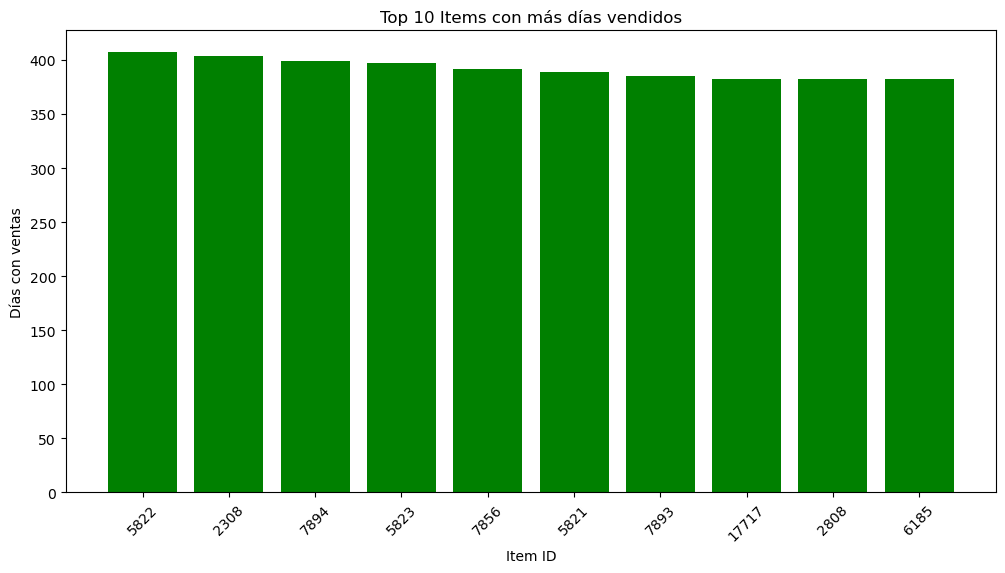

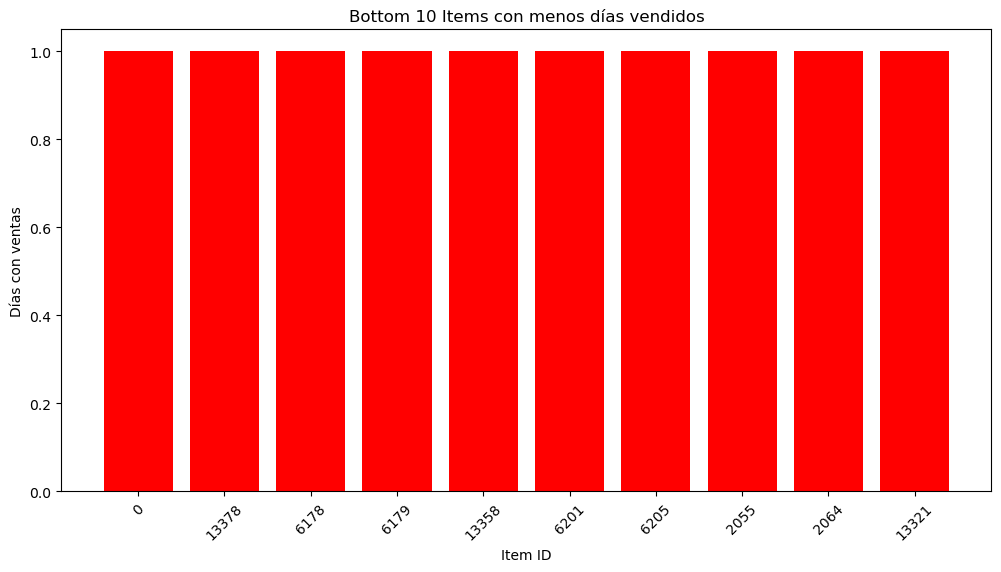

In [35]:
weekly_item_sales = weekly_item_sales.rename(columns = {'date': 'days_item_sold'})

total_days_item = weekly_item_sales.groupby('item_id')['days_item_sold'].sum().reset_index()

top_items = total_days_item.sort_values(by = 'days_item_sold', ascending = False).head(10)
bottom_items = total_days_item.sort_values(by = 'days_item_sold', ascending = True).head(10)

plt.figure(figsize = (12,6))
plt.bar(top_items['item_id'].astype(str), top_items['days_item_sold'], color = 'green')
plt.title("Top 10 Items con más días vendidos")
plt.xlabel("Item ID")
plt.ylabel("Días con ventas")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize = (12,6))
plt.bar(bottom_items['item_id'].astype(str), bottom_items['days_item_sold'], color = 'red')
plt.title("Bottom 10 Items con menos días vendidos")
plt.xlabel("Item ID")
plt.ylabel("Días con ventas")
plt.xticks(rotation = 45)
plt.show()

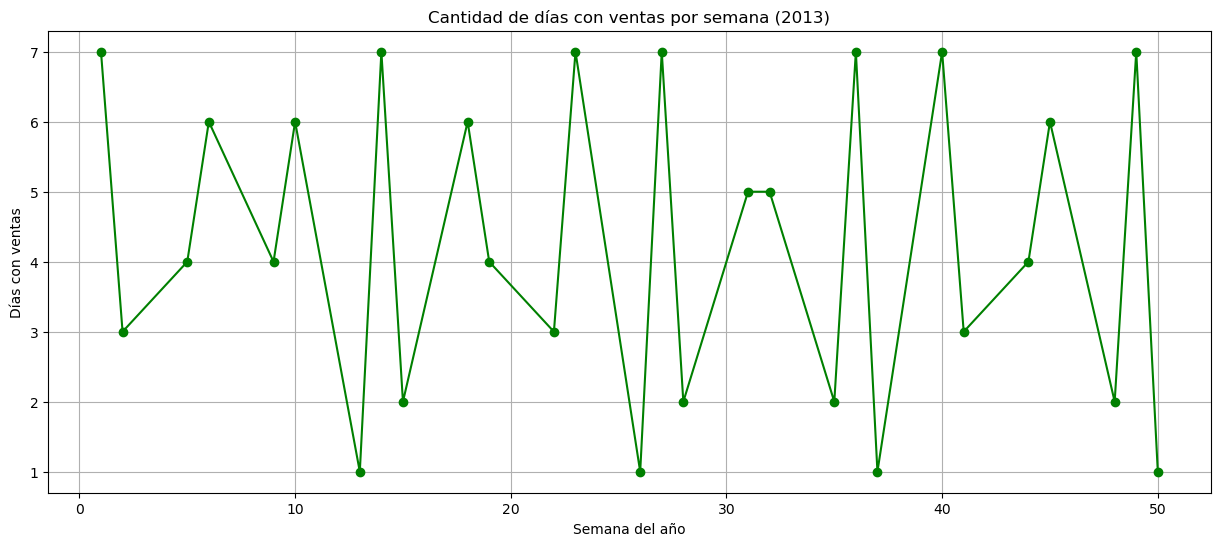

In [36]:
weekly_2013 = weekly_days_sold[weekly_days_sold['year'] == 2015]

plt.figure(figsize = (15,6))
plt.plot(weekly_2013['week'], weekly_2013['days_with_sales'], marker = 'o', linestyle = '-', color = 'green')
plt.title("Cantidad de días con ventas por semana (2013)")
plt.xlabel("Semana del año")
plt.ylabel("Días con ventas")
plt.grid(True)
plt.show()

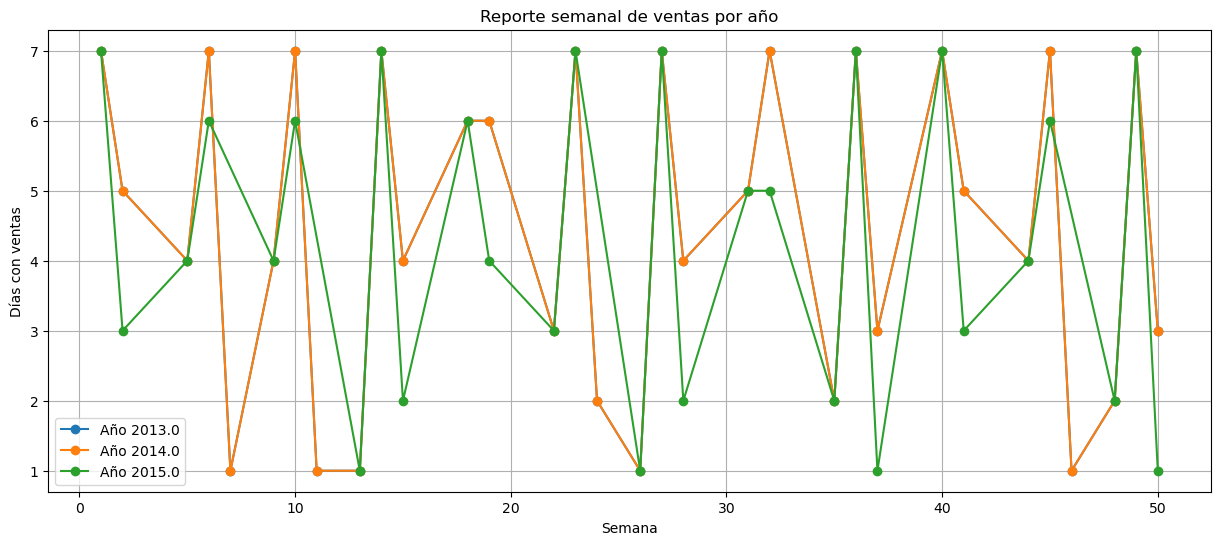

In [37]:
plt.figure(figsize=(15, 6))

for year in weekly_report['year'].unique():
    data_year = weekly_report[weekly_report['year'] == year]
    plt.plot(data_year['week'], data_year['days_with_sales'], marker='o', linestyle='-', label=f"Año {year}")

plt.title("Reporte semanal de ventas por año")
plt.xlabel("Semana")
plt.ylabel("Días con ventas")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
def plot_weekly_sales(weekly_report, year):
    plt.figure(figsize=(15, 6))

    if year is None:
        # Graficar todos los años
        for yr in weekly_report['year'].unique():
            data_year = weekly_report[weekly_report['year'] == yr]
            plt.plot(data_year['week'], data_year['days_with_sales'], marker='o', linestyle='-', label=f"Año {yr}")
        plt.title("Reporte semanal de ventas por año (todos)")
    else:
        # Graficar solo el año seleccionado
        data_year = weekly_report[weekly_report['year'] == year]
        plt.plot(data_year['week'], data_year['days_with_sales'], marker='o', linestyle='-', label=f"Año {year}", color="blue")
        plt.title(f"Reporte semanal de ventas - Año {year}")

    plt.xlabel("Semana")
    plt.ylabel("Días con ventas")
    plt.legend()
    plt.grid(True)
    plt.show()


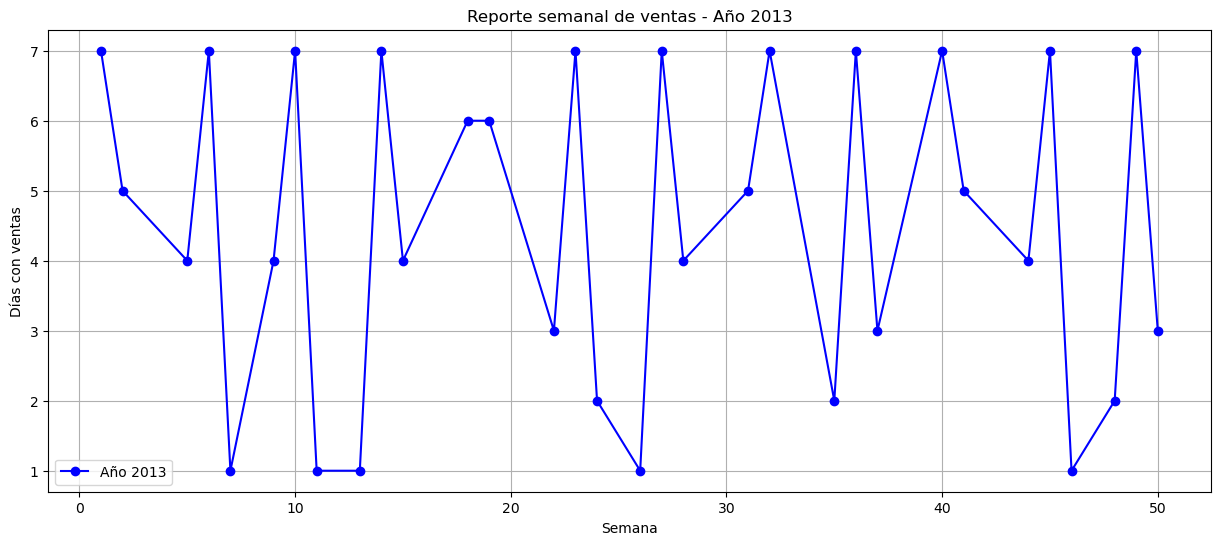

In [39]:
plot_weekly_sales(weekly_days_sold, 2013)


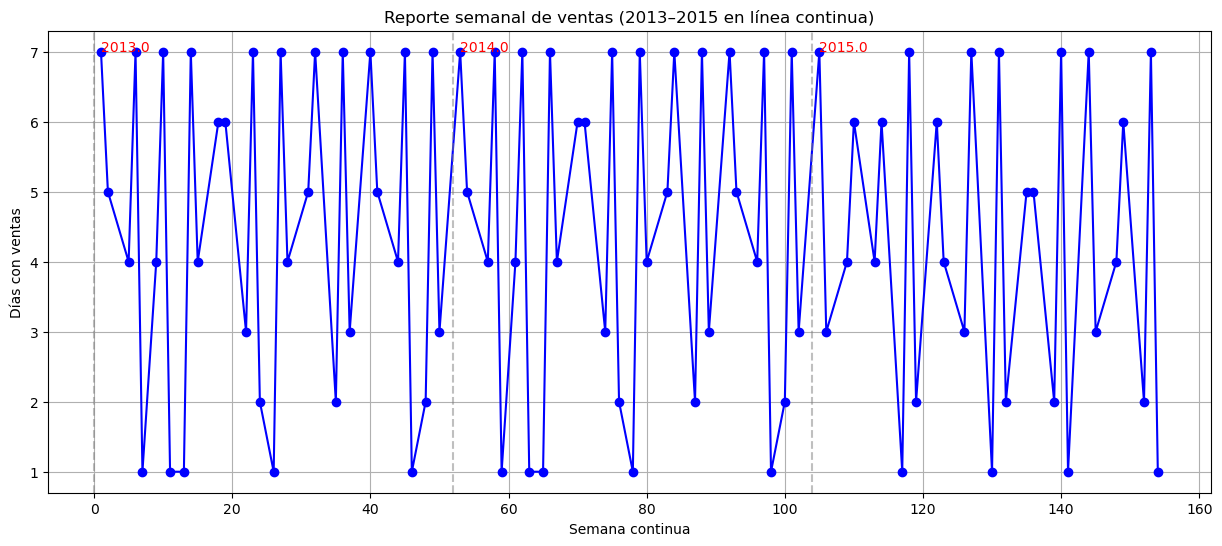

In [40]:
df_continuous = weekly_report.copy()

weeks_per_year = 52
df_continuous['week_continuous'] = (df_continuous['year'] - df_continuous['year'].min()) * weeks_per_year + df_continuous['week']

plt.figure(figsize=(15, 6))
plt.plot(df_continuous['week_continuous'], df_continuous['days_with_sales'], marker='o', linestyle='-', color="blue")

plt.title("Reporte semanal de ventas (2013–2015 en línea continua)")
plt.xlabel("Semana continua")
plt.ylabel("Días con ventas")
plt.grid(True)

# Marcar divisiones por año
for year in df_continuous['year'].unique():
    x_pos = (year - df_continuous['year'].min()) * weeks_per_year
    plt.axvline(x=x_pos, color='gray', linestyle='--', alpha=0.5)
    plt.text(x_pos + 1, df_continuous['days_with_sales'].max(), str(year), color="red")

plt.show()


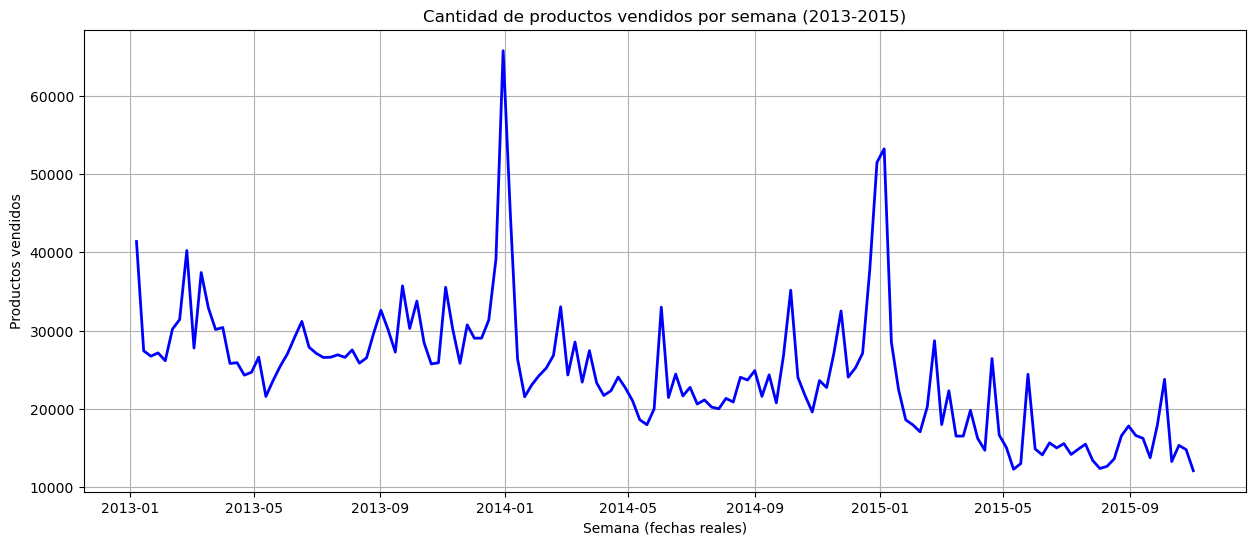

In [41]:
sales_final = pd.read_csv("sales_final.csv")
sales_final['date'] = pd.to_datetime(sales_final['date'])

weekly_sales = sales_final.set_index('date') \
                          .resample('W-MON')['item_cnt_day'] \
                          .sum() \
                          .asfreq('W-MON') \
                          .reset_index()

weekly_sales['week_global'] = range(1, len(weekly_sales) + 1)

# weekly_sales.to_csv("weekly_sales.csv", index=False)

plt.figure(figsize=(15,6))
plt.plot(weekly_sales['date'], weekly_sales['item_cnt_day'], color="blue", linewidth=2)
plt.title("Cantidad de productos vendidos por semana (2013-2015)")
plt.xlabel("Semana (fechas reales)")
plt.ylabel("Productos vendidos")
plt.grid(True)
plt.show()

In [42]:
weekly_sales.tail()

,date,item_cnt_day,week_global
143,2015-10-05,23778.0,144
144,2015-10-12,13289.0,145
145,2015-10-19,15347.0,146
146,2015-10-26,14808.0,147
147,2015-11-02,12111.0,148


#### SARIMA

c:\Users\dimas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


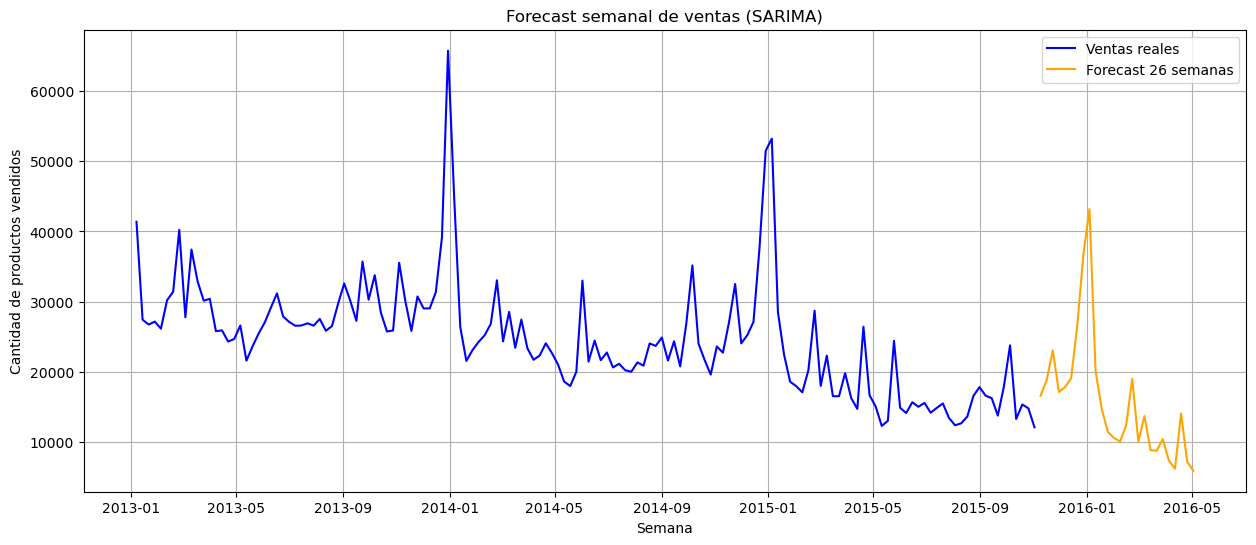

In [43]:
#modelos forecast
#ultimas 26 semanas del año
from statsmodels.tsa.statespace.sarimax import SARIMAX

weekly_sales = pd.read_csv("weekly_sales.csv")
weekly_sales['date'] = pd.to_datetime(weekly_sales['date'])
weekly_sales.set_index('date', inplace=True)

weekly_sales = weekly_sales.asfreq('W-MON')

model = SARIMAX(weekly_sales['item_cnt_day'],
                order=(1,1,1), 
                seasonal_order=(1,1,1,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit(disp=False)

forecast = sarima_model.get_forecast(steps=26)
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1),
                               periods=26, freq='W-MON')

forecast_table = pd.DataFrame({
    'fecha': forecast_index,
    'forecast_ventas': forecast_values
})

plt.figure(figsize=(15,6))
plt.plot(weekly_sales.index, weekly_sales['item_cnt_day'], label="Ventas reales", color="blue")
plt.plot(forecast_index, forecast_values, label="Forecast 26 semanas", color="orange")
plt.title("Forecast semanal de ventas (SARIMA)")
plt.xlabel("Semana")
plt.ylabel("Cantidad de productos vendidos")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
forecast_table

,fecha,forecast_ventas
2015-11-09,2015-11-09,16585.083676
2015-11-16,2015-11-16,18849.499019
2015-11-23,2015-11-23,23068.479231
2015-11-30,2015-11-30,17125.188058
2015-12-07,2015-12-07,17819.325965
2015-12-14,2015-12-14,19096.969745
2015-12-21,2015-12-21,26565.912176
2015-12-28,2015-12-28,36695.073273
2016-01-04,2016-01-04,43188.393642
2016-01-11,2016-01-11,20140.412681


#### Holt-Winters

c:\Users\dimas\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


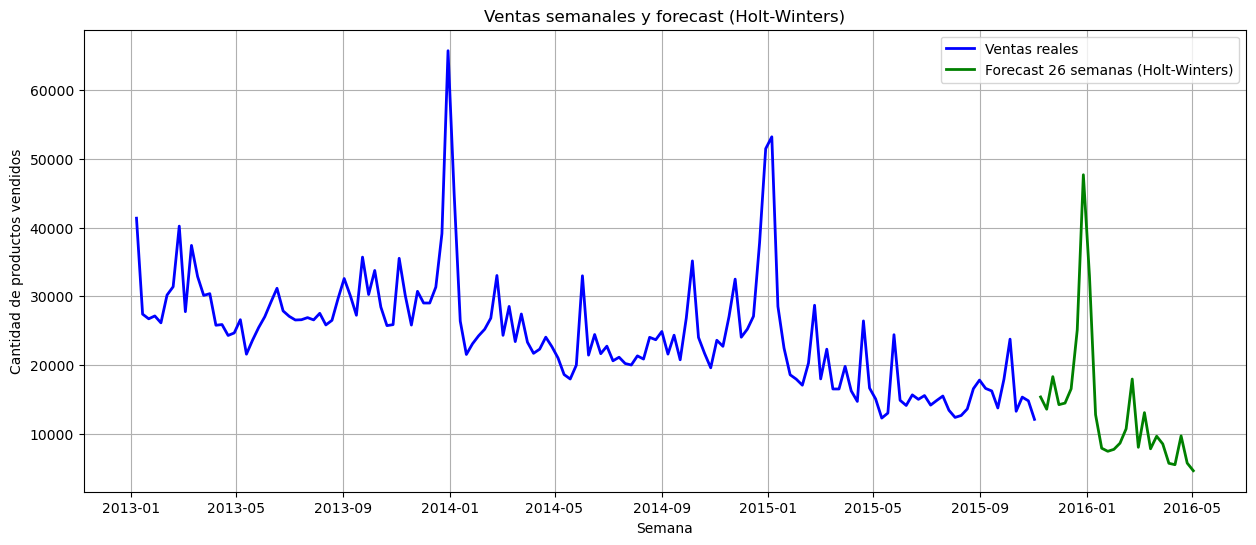

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

weekly_sales = pd.read_csv("weekly_sales.csv")
weekly_sales['date'] = pd.to_datetime(weekly_sales['date'])
weekly_sales.set_index('date', inplace=True)

weekly_sales = weekly_sales.asfreq('W-MON')

hw_model = ExponentialSmoothing(
    weekly_sales['item_cnt_day'],
    trend='add',
    seasonal='add',
    seasonal_periods=52
).fit()

forecast_values = hw_model.forecast(26)
forecast_index = pd.date_range(
    start=weekly_sales.index[-1] + pd.Timedelta(weeks=1),
    periods=26,
    freq='W-MON'
)

forecast_table_hw = pd.DataFrame({
    'fecha': forecast_index,
    'forecast_ventas': forecast_values
})

plt.figure(figsize=(15,6))
plt.plot(weekly_sales.index, weekly_sales['item_cnt_day'], label="Ventas reales", color="blue", linewidth=2)
plt.plot(forecast_index, forecast_values, label="Forecast 26 semanas (Holt-Winters)", color="green", linewidth=2)
plt.title("Ventas semanales y forecast (Holt-Winters)")
plt.xlabel("Semana")
plt.ylabel("Cantidad de productos vendidos")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
forecast_table_hw

,fecha,forecast_ventas
2015-11-09,2015-11-09,15368.745479
2015-11-16,2015-11-16,13589.134226
2015-11-23,2015-11-23,18324.526293
2015-11-30,2015-11-30,14248.421762
2015-12-07,2015-12-07,14478.470507
2015-12-14,2015-12-14,16555.006804
2015-12-21,2015-12-21,25122.035740
2015-12-28,2015-12-28,47691.749747
2016-01-04,2016-01-04,32990.470572
2016-01-11,2016-01-11,12787.284600


#### Plan Financiero

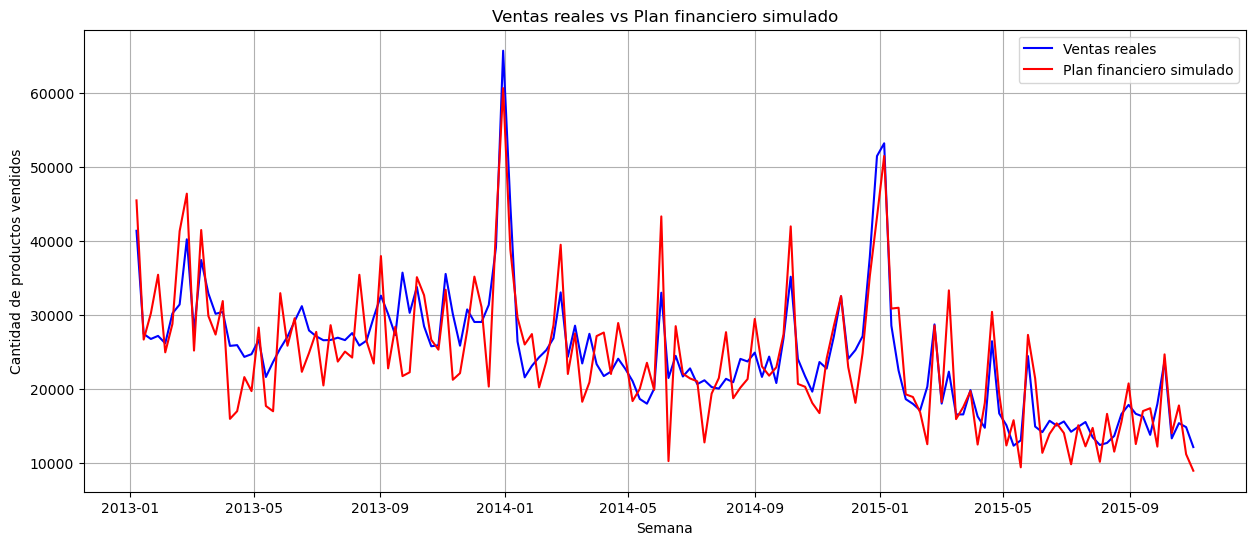

In [47]:
weekly_sales = pd.read_csv("weekly_sales.csv")
weekly_sales['date'] = pd.to_datetime(weekly_sales['date'])
weekly_sales.set_index('date', inplace=True)

weekly_sales = weekly_sales.asfreq('W-MON')

mean = weekly_sales['item_cnt_day'].values
std = np.maximum(mean * 0.2, 1)  

np.random.seed(42) 
ventas_plan = np.random.normal(mean, std)
ventas_plan = np.clip(ventas_plan, 0, None)  

plan_financiero = weekly_sales.copy()
plan_financiero['ventas_plan'] = ventas_plan
#plan_financiero.reset_index().to_csv("plan_financiero.csv", index=False)

plt.figure(figsize=(15,6))
plt.plot(plan_financiero.index, plan_financiero['item_cnt_day'], label="Ventas reales", color="blue")
plt.plot(plan_financiero.index, plan_financiero['ventas_plan'], label="Plan financiero simulado", color="red")
plt.title("Ventas reales vs Plan financiero simulado")
plt.xlabel("Semana")
plt.ylabel("Cantidad de productos vendidos")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# mediados 2015 para atras construccion de modelos
# train, test 
# testing mayo 2015 oct 2015
# menor error RMSE 

# usar el de menor error para entrenar toda la data historica 
# rehacer forecast para junio 2016

#### SARIMA Construcción de Modelo

c:\Users\dimas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE SARIMA: 4243.41
Promedio semanal de ventas (train): 26383.54
Error relativo respecto al promedio: 16.08%


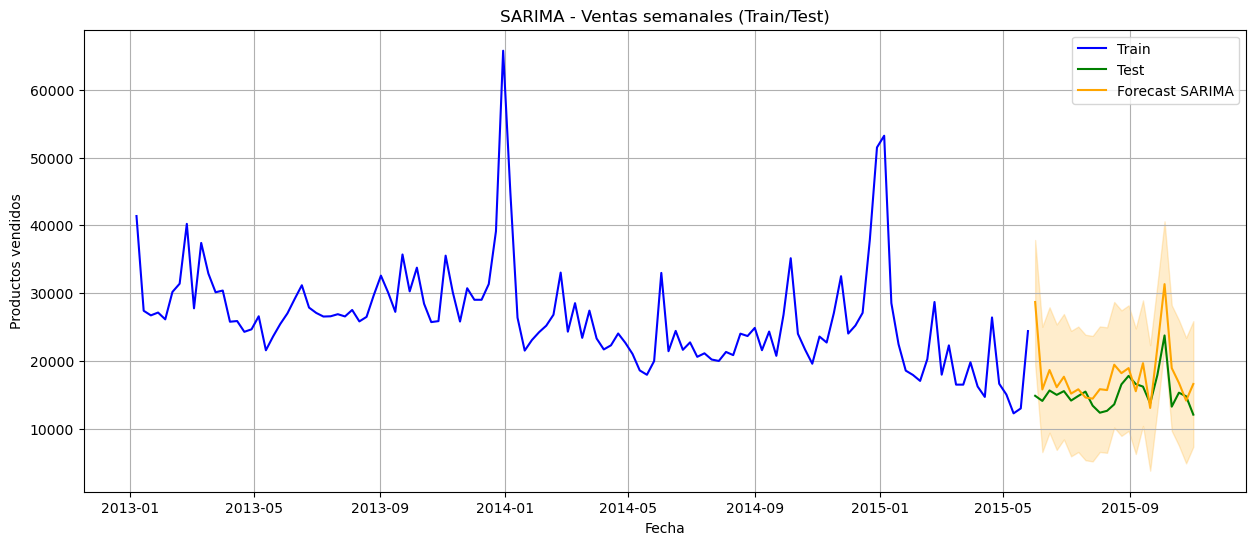

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math

weekly_sales = pd.read_csv("weekly_sales.csv")
weekly_sales['date'] = pd.to_datetime(weekly_sales['date'])
weekly_sales.set_index('date', inplace=True)

weekly_sales = weekly_sales.asfreq('W-MON')

train = weekly_sales.loc[:'2015-05-31']
test = weekly_sales.loc['2015-06-01':]

model = SARIMAX(train['item_cnt_day'],
                order=(1,1,1),
                seasonal_order=(1,1,1,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit(disp=False)

forecast = sarima_model.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

rmse = math.sqrt(mean_squared_error(test['item_cnt_day'], forecast_values))
print(f"RMSE SARIMA: {rmse:.2f}")

promedio_train = train['item_cnt_day'].mean()
print(f"Promedio semanal de ventas (train): {promedio_train:.2f}")

error_relativo = (rmse / promedio_train) * 100
print(f"Error relativo respecto al promedio: {error_relativo:.2f}%")

plt.figure(figsize=(15,6))
plt.plot(train.index, train['item_cnt_day'], label="Train", color="blue")
plt.plot(test.index, test['item_cnt_day'], label="Test", color="green")
plt.plot(test.index, forecast_values, label="Forecast SARIMA", color="orange")
plt.fill_between(test.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='orange', alpha=0.2)
plt.title("SARIMA - Ventas semanales (Train/Test)")
plt.xlabel("Fecha")
plt.ylabel("Productos vendidos")
plt.legend()
plt.grid(True)
plt.show()


#### Holt-Winters Construcción de Modelo

Promedio semanal (train): 26383.54
RMSE Holt-Winters: 6240.21
Error relativo respecto al promedio: 23.65%


c:\Users\dimas\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


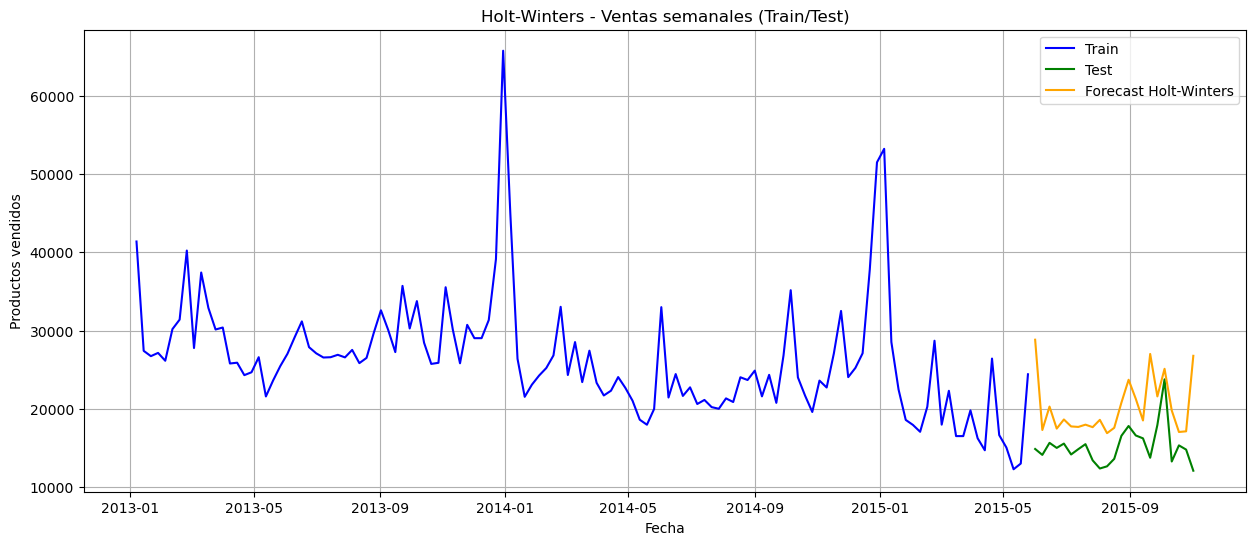

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

weekly_sales = pd.read_csv("weekly_sales.csv")
weekly_sales['date'] = pd.to_datetime(weekly_sales['date'])
weekly_sales.set_index('date', inplace=True)

weekly_sales = weekly_sales.asfreq('W-MON')

train = weekly_sales.loc[:'2015-05-31']
test = weekly_sales.loc['2015-06-01':]

hw_model = ExponentialSmoothing(
    train['item_cnt_day'],
    trend='add',
    seasonal='add',
    seasonal_periods=52
).fit()

forecast_values = hw_model.forecast(len(test))

rmse_hw = math.sqrt(mean_squared_error(test['item_cnt_day'], forecast_values))

promedio_train = train['item_cnt_day'].mean()

error_relativo = (rmse_hw / promedio_train) * 100

print(f"Promedio semanal (train): {promedio_train:.2f}")
print(f"RMSE Holt-Winters: {rmse_hw:.2f}")
print(f"Error relativo respecto al promedio: {error_relativo:.2f}%")

plt.figure(figsize=(15,6))
plt.plot(train.index, train['item_cnt_day'], label="Train", color="blue")
plt.plot(test.index, test['item_cnt_day'], label="Test", color="green")
plt.plot(test.index, forecast_values, label="Forecast Holt-Winters", color="orange")
plt.title("Holt-Winters - Ventas semanales (Train/Test)")
plt.xlabel("Fecha")
plt.ylabel("Productos vendidos")
plt.legend()
plt.grid(True)
plt.show()


#### SARIMA Forecast

c:\Users\dimas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


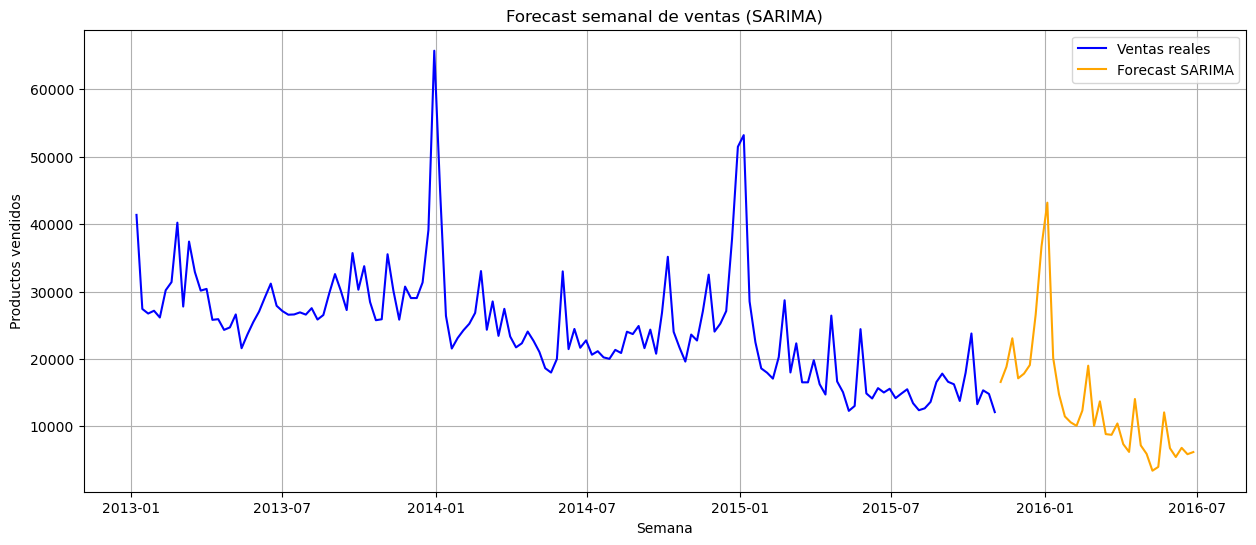

In [51]:
weekly_sales = pd.read_csv("weekly_sales.csv")
weekly_sales['date'] = pd.to_datetime(weekly_sales['date'])
weekly_sales.set_index('date', inplace=True)

weekly_sales = weekly_sales.asfreq('W-MON')

sarima_model = SARIMAX(
    weekly_sales['item_cnt_day'],
    order=(1,1,1),
    seasonal_order=(1,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

start_date = weekly_sales.index[-1] + pd.Timedelta(weeks=1)
end_date = pd.to_datetime('2016-06-30')
forecast_index = pd.date_range(start=start_date, end=end_date, freq='W-MON')
forecast_values = sarima_model.get_forecast(steps=len(forecast_index)).predicted_mean

historical_forecast = weekly_sales[['item_cnt_day']].reset_index()
forecast_df = pd.DataFrame({
    'date': forecast_index,
    'forecast_item_cnt': forecast_values
})
historical_forecast = historical_forecast.merge(forecast_df, on='date', how='outer')

#historical_forecast.to_csv("historical_forecast_sales.csv", index=False)

plt.figure(figsize=(15,6))
plt.plot(historical_forecast['date'], historical_forecast['item_cnt_day'], 
         label="Ventas reales", color="blue")
plt.plot(historical_forecast['date'], historical_forecast['forecast_item_cnt'], 
         label="Forecast SARIMA", color="orange")
plt.title("Forecast semanal de ventas (SARIMA)")
plt.xlabel("Semana")
plt.ylabel("Productos vendidos")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
data = pd.read_csv("historical_forecast_sales.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

mean = data['item_cnt_day'].fillna(data['forecast_item_cnt']).values

std = np.maximum(mean * 0.2, 1)
np.random.seed(42)
ventas_plan = np.random.normal(mean, std)
ventas_plan = np.clip(ventas_plan, 0, None)

data['ventas_plan'] = ventas_plan

#data.reset_index().to_csv("plan_financiero_forecast.csv", index=False)


#### Gráficas Hasta 2016

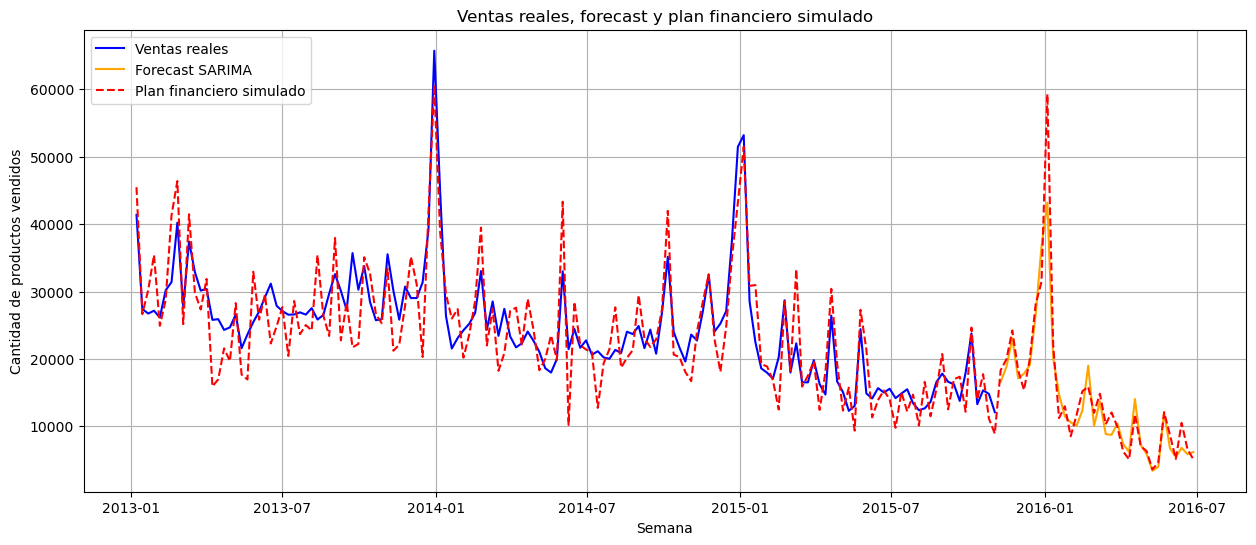

In [53]:
# plan financiero encima hasta 2016 HACER CSV
# una grafica con toda la historia y el plan financiero
# otra solo del plan financiero

plt.figure(figsize=(15,6))
plt.plot(data.index, data['item_cnt_day'], label="Ventas reales", color="blue")
plt.plot(data.index, data['forecast_item_cnt'], label="Forecast SARIMA", color="orange")
plt.plot(data.index, data['ventas_plan'], label="Plan financiero simulado", color="red", linestyle="--")
plt.title("Ventas reales, forecast y plan financiero simulado")
plt.xlabel("Semana")
plt.ylabel("Cantidad de productos vendidos")
plt.legend()
plt.grid(True)
plt.show()

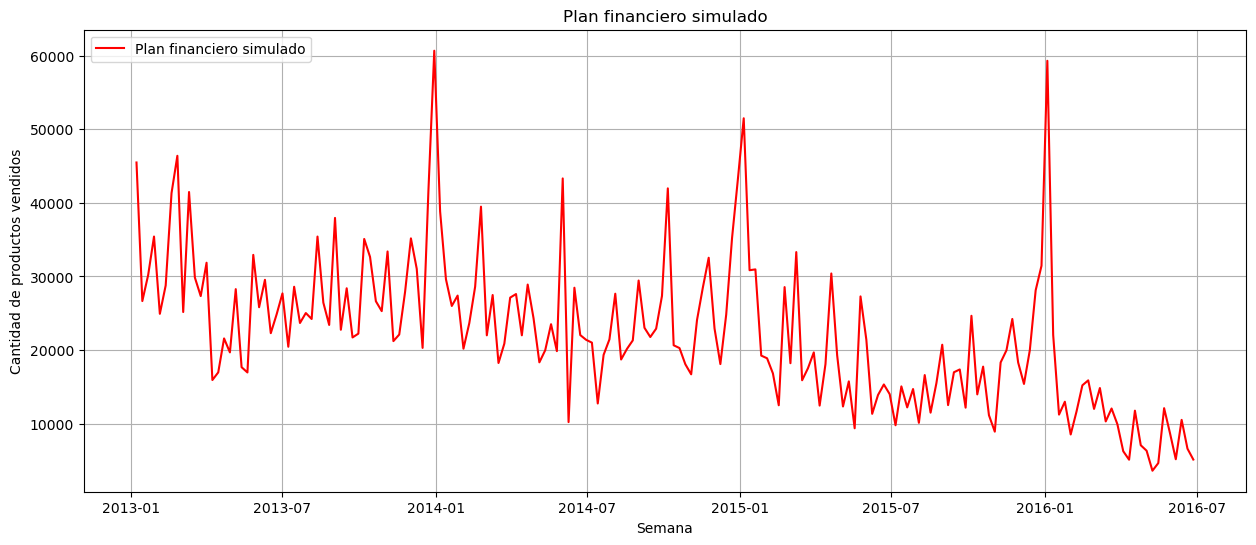

In [54]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data['ventas_plan'], label="Plan financiero simulado", color="red")
plt.title("Plan financiero simulado")
plt.xlabel("Semana")
plt.ylabel("Cantidad de productos vendidos")
plt.legend()
plt.grid(True)
plt.show()

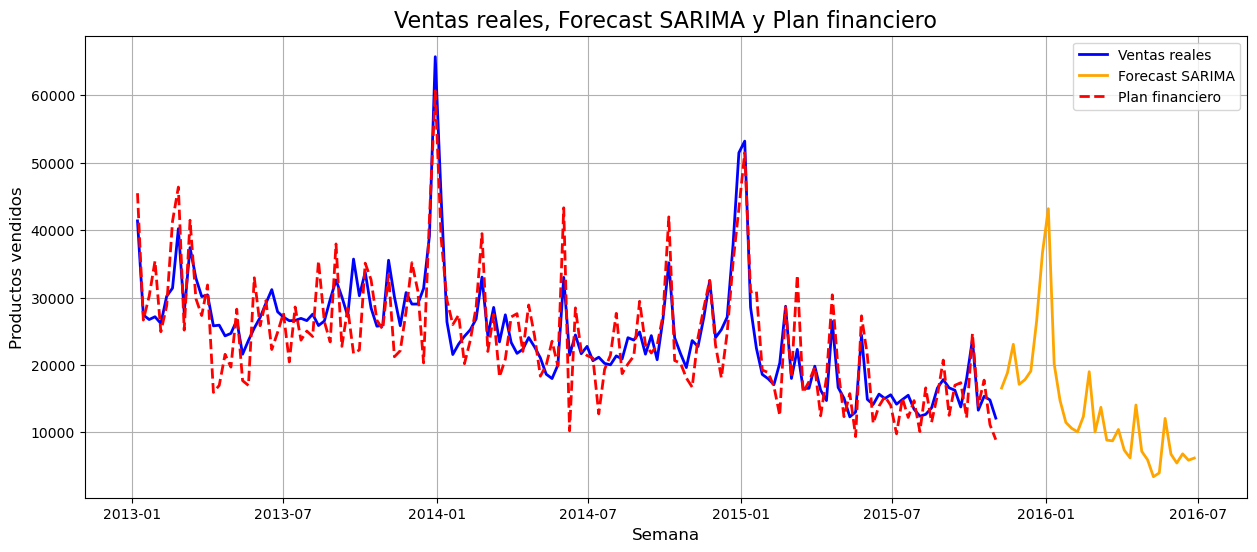

In [55]:
historical_forecast = pd.read_csv("historical_forecast_sales.csv")
plan_financiero = pd.read_csv("plan_financiero.csv")

historical_forecast['date'] = pd.to_datetime(historical_forecast['date'])
plan_financiero['date'] = pd.to_datetime(plan_financiero['date'])

plt.figure(figsize=(15,6))
plt.plot(historical_forecast['date'], historical_forecast['item_cnt_day'], 
         label="Ventas reales", color="blue", linewidth=2)
plt.plot(historical_forecast['date'], historical_forecast['forecast_item_cnt'], 
         label="Forecast SARIMA", color="orange", linewidth=2)
plt.plot(plan_financiero['date'], plan_financiero['ventas_plan'], 
         label="Plan financiero", color="red", linestyle="--", linewidth=2)
plt.title("Ventas reales, Forecast SARIMA y Plan financiero", fontsize=16)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Productos vendidos", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

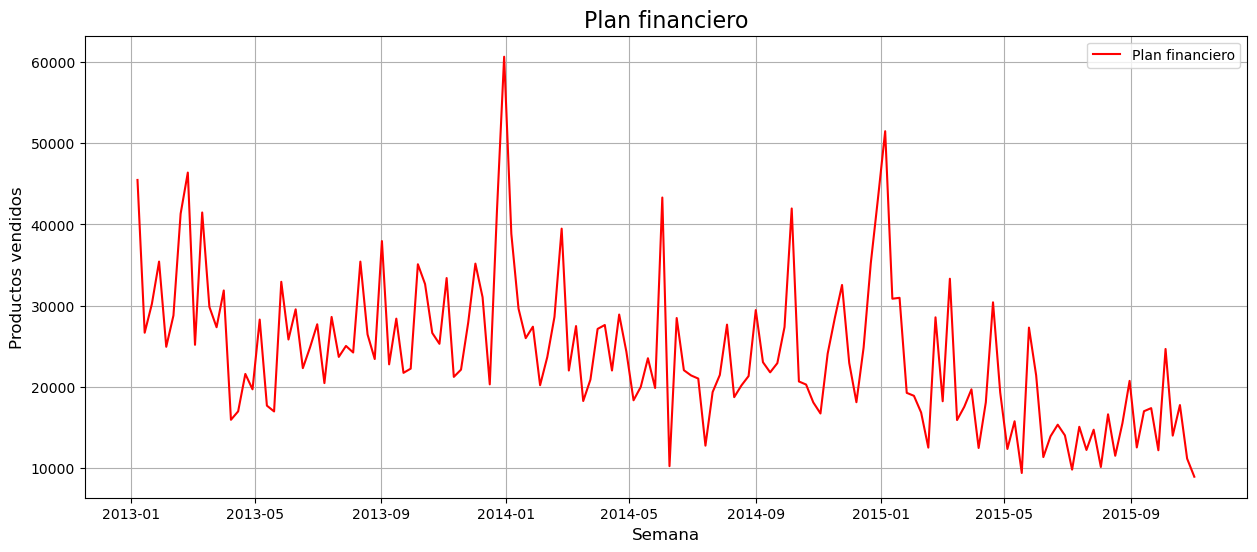

In [56]:
plt.figure(figsize=(15,6))
plt.plot(plan_financiero['date'], plan_financiero['ventas_plan'], 
         label="Plan financiero", color="red")
plt.title("Plan financiero", fontsize=16)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Productos vendidos", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# ver en que puntos la venta está por debajo del plan financiero
# extraer esos puntos ventas/semana

historical_forecast = pd.read_csv("historical_forecast_sales.csv")
plan_financiero = pd.read_csv("plan_financiero_forecast.csv")

historical_forecast = historical_forecast.rename(columns={'forecast_item_cnt': 'forecast_item_cnt_hist'})
plan_financiero = plan_financiero.rename(columns={'forecast_item_cnt': 'forecast_item_cnt_plan'})

historical_forecast['date'] = pd.to_datetime(historical_forecast['date'])
plan_financiero['date'] = pd.to_datetime(plan_financiero['date'])

merged = pd.merge(historical_forecast, plan_financiero, on='date', how='inner')

merged['under_real'] = merged['item_cnt_day'] < merged['ventas_plan']
merged['under_forecast_hist'] = merged['forecast_item_cnt_hist'] < merged['ventas_plan']
merged['under_forecast_plan'] = merged['forecast_item_cnt_plan'] < merged['ventas_plan']

#merged.to_csv("forecast_underperform.csv", index=False)

merged


,date,item_cnt_day,forecast_item_cnt_hist,ventas_reales,forecast_item_cnt_plan,ventas_plan,under_real,under_forecast_hist,under_forecast_plan
0,2013-01-07,41376.0,NaN,41376.0,NaN,45486.408959,True,False,False
1,2013-01-14,27418.0,NaN,27418.0,NaN,26659.813878,False,False,False
2,2013-01-21,26739.0,NaN,26739.0,NaN,30202.708764,True,False,False
3,2013-01-28,27154.0,NaN,27154.0,NaN,35425.270544,True,False,False
4,2013-02-04,26152.0,NaN,26152.0,NaN,24927.284189,False,False,False
...,...,...,...,...,...,...,...,...,...
177,2016-05-30,NaN,6760.570495,NaN,6760.570495,8725.914415,False,True,True
178,2016-06-06,NaN,5451.869036,NaN,5451.869036,5163.294157,False,False,False
179,2016-06-13,NaN,6811.250970,NaN,6811.250970,10516.801945,False,True,True
180,2016-06-20,NaN,5866.977614,NaN,5866.977614,6601.132878,False,True,True


In [58]:
historical_forecast = pd.read_csv("historical_forecast_sales.csv")
plan_financiero = pd.read_csv("plan_financiero.csv")

historical_forecast['date'] = pd.to_datetime(historical_forecast['date'])
plan_financiero['date'] = pd.to_datetime(plan_financiero['date'])

merged_hist = pd.merge(
    historical_forecast,
    plan_financiero[['date', 'ventas_plan']],
    on='date',
    how='inner'
)

merged_hist['under_real'] = merged_hist['item_cnt_day'] < merged_hist['ventas_plan']
merged_hist['under_forecast'] = merged_hist['forecast_item_cnt'] < merged_hist['ventas_plan']

# --- Guardar CSV ---
#merged_hist.to_csv("historical_underperform.csv", index=False)

merged_hist


,date,item_cnt_day,forecast_item_cnt,ventas_plan,under_real,under_forecast
0,2013-01-07,41376.0,NaN,45486.408959,True,False
1,2013-01-14,27418.0,NaN,26659.813878,False,False
2,2013-01-21,26739.0,NaN,30202.708764,True,False
3,2013-01-28,27154.0,NaN,35425.270544,True,False
4,2013-02-04,26152.0,NaN,24927.284189,False,False
...,...,...,...,...,...,...
143,2015-10-05,23778.0,NaN,24656.044778,True,False
144,2015-10-12,13289.0,NaN,13979.716491,True,False
145,2015-10-19,15347.0,NaN,17746.727123,True,False
146,2015-10-26,14808.0,NaN,11144.646775,False,False


In [59]:
# STREAMLIT interfaces graficas python
# usuario interactue con los resultados
# aplicacion sencilla introductoria

In [ ]:
original =  pd.read_csv("forecast_underperform.csv")
forecast_underperform = original.drop(columns = [""])
original

,date,item_cnt_day,forecast_item_cnt_hist,ventas_reales,forecast_item_cnt_plan,ventas_plan,under_real,under_forecast_hist,under_forecast_plan
0,2013-01-07,41376.0,NaN,41376.0,NaN,45486.408959,True,False,False
1,2013-01-14,27418.0,NaN,27418.0,NaN,26659.813878,False,False,False
2,2013-01-21,26739.0,NaN,26739.0,NaN,30202.708764,True,False,False
3,2013-01-28,27154.0,NaN,27154.0,NaN,35425.270544,True,False,False
4,2013-02-04,26152.0,NaN,26152.0,NaN,24927.284189,False,False,False
...,...,...,...,...,...,...,...,...,...
177,2016-05-30,NaN,6760.570495,NaN,6760.570495,8725.914415,False,True,True
178,2016-06-06,NaN,5451.869036,NaN,5451.869036,5163.294157,False,False,False
179,2016-06-13,NaN,6811.250970,NaN,6811.250970,10516.801945,False,True,True
180,2016-06-20,NaN,5866.977614,NaN,5866.977614,6601.132878,False,True,True
